In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import prep_season
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

Prep_Season.py Loaded Successfully


In [2]:
df = prep_season.clean_season()

Dataframe Ready For Use


In [3]:
df

,time,x,y,s,a,dis,o,dir,pass_stopped,nflId,displayName,jerseyNumber,position,frameId,gameId,playId,playDirection,route,week,height,weight,birthDate,collegeName,age,time_since_last_x,force_per_second,is_home,is_defense
0,2018-09-07T01:07:19.700Z,96.10,27.82,0.99,1.14,0.10,327.40,311.41,0,310.00,Matt Ryan,2.00,QB,52,2018090600,75,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,9.09,0,0
1,2018-09-07T01:09:14.400Z,54.77,29.86,0.86,1.16,0.09,338.33,58.53,1,310.00,Matt Ryan,2.00,QB,48,2018090600,146,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,7.90,0,0
2,2018-09-07T01:09:55.200Z,55.38,27.42,0.86,0.04,0.09,181.68,180.92,1,310.00,Matt Ryan,2.00,QB,47,2018090600,168,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,7.90,0,0
3,2018-09-07T01:10:40.700Z,56.59,25.89,2.66,1.92,0.25,271.87,304.04,0,310.00,Matt Ryan,2.00,QB,62,2018090600,190,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.09,24.42,0,0
4,2018-09-07T01:12:42.000Z,18.59,25.33,2.19,0.98,0.22,40.17,54.47,1,310.00,Matt Ryan,2.00,QB,46,2018090600,256,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,20.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238414,2018-12-31T00:02:23.599Z,70.69,19.51,2.69,2.42,0.27,197.62,163.56,0,2552576.00,Sean Mannion,14.00,QB,47,2018123014,3534,1,NONE,17,78,231,1992-04-25,Oregon State,26.00,0.10,26.29,1,0
238415,2018-12-31T00:04:43.799Z,55.71,31.13,1.32,1.32,0.14,25.40,74.26,1,2552576.00,Sean Mannion,14.00,QB,47,2018123014,3603,1,NONE,17,78,231,1992-04-25,Oregon State,26.00,0.11,12.90,1,0
238416,2018-12-31T00:27:31.400Z,77.27,40.95,3.45,3.72,0.35,340.24,359.55,0,2552576.00,Sean Mannion,14.00,QB,52,2018123014,4088,1,NONE,17,78,231,1992-04-25,Oregon State,26.00,0.10,33.72,1,0
238417,2018-12-31T00:30:17.000Z,72.34,7.60,5.41,2.16,0.53,248.18,227.11,0,2561469.00,Darious Williams,31.00,CB,42,2018123014,4181,0,NONE,17,69,187,1993-03-15,Alabama-Birmingham,25.00,0.10,42.80,1,1


In [4]:
df['force_per_second'] = (((df.weight * 0.45359237)/ (9.8)) * (df.s / 1.094)).round(2)
df

,time,x,y,s,a,dis,o,dir,pass_stopped,nflId,displayName,jerseyNumber,position,frameId,gameId,playId,playDirection,route,week,height,weight,birthDate,collegeName,age,time_since_last_x,force_per_second,is_home,is_defense
0,2018-09-07T01:07:19.700Z,96.10,27.82,0.99,1.14,0.10,327.40,311.41,0,310.00,Matt Ryan,2.00,QB,52,2018090600,75,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,9.09,0,0
1,2018-09-07T01:09:14.400Z,54.77,29.86,0.86,1.16,0.09,338.33,58.53,1,310.00,Matt Ryan,2.00,QB,48,2018090600,146,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,7.90,0,0
2,2018-09-07T01:09:55.200Z,55.38,27.42,0.86,0.04,0.09,181.68,180.92,1,310.00,Matt Ryan,2.00,QB,47,2018090600,168,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,7.90,0,0
3,2018-09-07T01:10:40.700Z,56.59,25.89,2.66,1.92,0.25,271.87,304.04,0,310.00,Matt Ryan,2.00,QB,62,2018090600,190,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.09,24.42,0,0
4,2018-09-07T01:12:42.000Z,18.59,25.33,2.19,0.98,0.22,40.17,54.47,1,310.00,Matt Ryan,2.00,QB,46,2018090600,256,1,NONE,1,76,217,1985-05-17,Boston College,33.00,0.10,20.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238414,2018-12-31T00:02:23.599Z,70.69,19.51,2.69,2.42,0.27,197.62,163.56,0,2552576.00,Sean Mannion,14.00,QB,47,2018123014,3534,1,NONE,17,78,231,1992-04-25,Oregon State,26.00,0.10,26.29,1,0
238415,2018-12-31T00:04:43.799Z,55.71,31.13,1.32,1.32,0.14,25.40,74.26,1,2552576.00,Sean Mannion,14.00,QB,47,2018123014,3603,1,NONE,17,78,231,1992-04-25,Oregon State,26.00,0.11,12.90,1,0
238416,2018-12-31T00:27:31.400Z,77.27,40.95,3.45,3.72,0.35,340.24,359.55,0,2552576.00,Sean Mannion,14.00,QB,52,2018123014,4088,1,NONE,17,78,231,1992-04-25,Oregon State,26.00,0.10,33.72,1,0
238417,2018-12-31T00:30:17.000Z,72.34,7.60,5.41,2.16,0.53,248.18,227.11,0,2561469.00,Darious Williams,31.00,CB,42,2018123014,4181,0,NONE,17,69,187,1993-03-15,Alabama-Birmingham,25.00,0.10,42.80,1,1


In [19]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Turn off warnings
import warnings
warnings.filterwarnings("ignore")

# split_scale
# import split_scale

# libraries needed for preparing the data:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PowerTransformer, RobustScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing


##### This is the key function that returns 6 dataframes #####
def train_validate_test(df):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 30% of the entire dataframe, 
    a validate, which is 28% of the entire dataframe,
    and a train, which is 42% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (30%) and train_validate (70%)
    train_validate, test = train_test_split(df, test_size=.3, random_state=123, stratify = df.pass_stopped)

    # split train_validate off into train (60% of 70% = 42%) and validate (40% of 70% = 28%)
    train, validate = train_test_split(train_validate, test_size=.4, random_state=123, stratify = train_validate.pass_stopped)

        
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns= ['time', 'nflId', 'displayName',
                                  'jerseyNumber', 'frameId', 'gameId', 'playId',
                                  'route', 'week', 'birthDate'])
    X_validate = validate.drop(columns= ['time', 'nflId', 'displayName',
                                  'jerseyNumber', 'frameId', 'gameId', 'playId',
                                  'route', 'week', 'birthDate'])
    X_test = test.drop(columns= ['time', 'nflId', 'displayName',
                                  'jerseyNumber', 'frameId', 'gameId', 'playId',
                                  'route', 'week', 'birthDate'])

    y_train = train[['pass_stopped']]
    y_validate = validate[['pass_stopped']]
    y_test = test[['pass_stopped']]
    return X_train, y_train, X_validate, y_validate, X_test, y_test


def min_max_scale(X_train, X_validate, X_test):
    '''
    this function takes in 3 dataframes with the same columns, 
    a list of numeric column names (because the scaler can only work with numeric columns),
    and fits a min-max scaler to the first dataframe and transforms all
    3 dataframes using that scaler. 
    it returns 3 dataframes with the same column names and scaled values. 
    '''
    # create the scaler object and fit it to X_train (i.e. identify min and max)
    # if copy = false, inplace row normalization happens and avoids a copy (if the input is already a numpy array).
    X_train = X_train.drop(columns = {'collegeName', 'position', 'pass_stopped'})
    X_validate = X_validate.drop(columns = {'collegeName', 'position', 'pass_stopped'})
    X_test = X_test.drop(columns = {'collegeName', 'position', 'pass_stopped'})
    scaler = MinMaxScaler(copy = True).fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns.values).set_index([X_train.index.values])
    X_validate_scaled = pd.DataFrame(X_validate_scaled, columns = X_validate.columns.values).set_index([X_validate.index.values])
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns.values).set_index([X_test.index.values])

    
    return X_train_scaled, X_validate_scaled, X_test_scaled


In [20]:
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df)

In [21]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test)

In [22]:
X_train_scaled

,x,y,s,a,dis,o,dir,playDirection,height,weight,age,time_since_last_x,force_per_second,is_home,is_defense
68550,0.58,0.48,0.49,0.35,0.18,0.53,0.55,1.00,0.64,0.51,0.38,0.03,0.44,0.00,1.00
5923,0.76,0.55,0.52,0.27,0.18,0.63,0.63,1.00,0.79,0.50,0.19,0.03,0.45,0.00,0.00
131507,0.47,0.75,0.38,0.25,0.14,0.60,0.96,1.00,0.21,0.15,0.29,0.03,0.25,0.00,1.00
157923,0.60,0.33,0.24,0.20,0.09,0.03,0.94,1.00,0.50,0.28,0.19,0.03,0.18,0.00,0.00
226590,0.72,0.54,0.24,0.30,0.09,0.93,0.93,1.00,0.57,0.38,0.38,0.03,0.19,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235131,0.79,0.50,0.41,0.27,0.15,0.71,0.64,0.00,0.57,0.26,0.38,0.03,0.30,0.00,1.00
134197,0.51,0.62,0.37,0.11,0.13,0.43,0.41,1.00,0.36,0.17,0.71,0.03,0.24,0.00,1.00
148826,0.46,0.46,0.47,0.15,0.17,0.61,0.27,0.00,0.50,0.46,0.29,0.03,0.40,0.00,1.00
98103,0.15,0.42,0.26,0.32,0.09,0.92,0.01,1.00,0.57,0.29,0.14,0.03,0.19,1.00,0.00


In [37]:
###### Import kmeans to create clusters on the selected features
from sklearn.cluster import KMeans
X1_train = X_train_scaled[['height', 'weight', 'age', 'is_defense']]
X1_val = X_validate_scaled[['height', 'weight', 'age', 'is_defense']]
X1_test = X_test_scaled[['height', 'weight', 'age', 'is_defense']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X1_train)

KMeans(n_clusters=2)

In [38]:
pd.DataFrame(kmeans.cluster_centers_, columns=X1_train.columns)

,height,weight,age,is_defense
0,0.47,0.30,0.28,1.00
1,0.55,0.32,0.30,-0.00


In [39]:
X1_train.shape

(100116, 4)

In [40]:
X_train_scaled['phys_att_cluster'] = kmeans.predict(X1_train)
X_train['phys_att_cluster'] = kmeans.predict(X1_train)
X_validate_scaled['phys_att_cluster'] = kmeans.predict(X1_val)
X_validate['phys_att_cluster'] = kmeans.predict(X1_val)
X_test_scaled['phys_att_cluster'] = kmeans.predict(X1_test)
X_test['phys_att_cluster'] = kmeans.predict(X1_test)

In [41]:
X_train.groupby('phys_att_cluster').describe()

x                                                   y  \
                    count  mean   std   min   25%   50%   75%    max    count   
phys_att_cluster                                                                
0                56380.00 59.88 25.55 -1.74 42.03 59.77 77.67 122.93 56380.00   
1                43736.00 59.70 25.35 -3.13 40.99 59.53 78.29 123.46 43736.00   

                                                                  s            \
                  mean   std   min   25%   50%   75%   max    count mean  std   
phys_att_cluster                                                                
0                26.69 12.21 -6.58 17.59 26.70 35.77 60.06 56380.00 4.15 1.96   
1                26.78 13.42 -6.10 16.76 26.78 36.76 58.91 43736.00 3.58 2.30   

                                                  a                           \
                  min  25%  50%  75%   max    count mean  std  min  25%  50%   
phys_att_cluster                                                               
0                0.00 2.66 4.14 5.54 10.87 56380.00 2.54 1.35 0.00 1.51 2.38   
1                0.00 1.53 3.38 5.38 10.54 43736.00 2.17 1.26 0.01 1.18 2.04   

                                 dis                                     \
                  75%   max    count mean  std  min  25%  50%  75%  max   
phys_att_cluster                                                          
0                3.41 10.01 56380.00 0.42 0.20 0.00 0.27 0.41 0.56 2.99   
1                2.95 11.48 43736.00 0.36 0.23 0.00 0.16 0.34 0.54 2.08   

                        o                                                \
                    count   mean    std  min   25%    50%    75%    max   
phys_att_cluster                                                          
0                56380.00 180.81 105.92 0.00 94.14 179.76 270.14 360.00   
1                43736.00 181.72 104.60 0.02 94.37 180.61 271.28 359.99   

                      dir                                                \
                    count   mean    std  min   25%    50%    75%    max   
phys_att_cluster                                                          
0                56380.00 179.95 106.48 0.00 91.95 180.10 268.22 360.00   
1                43736.00 181.35 105.54 0.03 92.72 180.92 271.67 359.99   

                 pass_stopped                                     \
                        count mean  std  min  25%  50%  75%  max   
phys_att_cluster                                                   
0                    56380.00 0.37 0.48 0.00 0.00 0.00 1.00 1.00   
1                    43736.00 0.37 0.48 0.00 0.00 0.00 1.00 1.00   

                 playDirection                                      height  \
                         count mean  std  min  25%  50%  75%  max    count   
phys_att_cluster                                                             
0                     56380.00 0.50 0.50 0.00 0.00 1.00 1.00 1.00 56380.00   
1                     43736.00 0.50 0.50 0.00 0.00 1.00 1.00 1.00 43736.00   

                                                            weight         \
                  mean  std   min   25%   50%   75%   max    count   mean   
phys_att_cluster                                                            
0                72.54 1.87 68.00 71.00 72.00 74.00 80.00 56380.00 214.69   
1                73.63 2.79 66.00 71.00 74.00 76.00 80.00 43736.00 218.35   

                                                               age             \
                   std    min    25%    50%    75%    max    count  mean  std   
phys_att_cluster                                                                
0                23.78 159.00 195.00 208.00 235.00 347.00 56380.00 25.90 3.23   
1                23.43 160.00 201.00 215.00 236.00 280.00 43736.00 26.21 3.78   

                                               time_since_last_x            \
                   min   25%   50%   75%   max             count mean  std   
phy

In [42]:
X_train_scaled.groupby('phys_att_cluster').size()

phys_att_cluster
0    56380
1    43736
dtype: int64

[Text(0, 0.5, 'Distance Traveled'), Text(0.5, 0, 'Players Speed')]

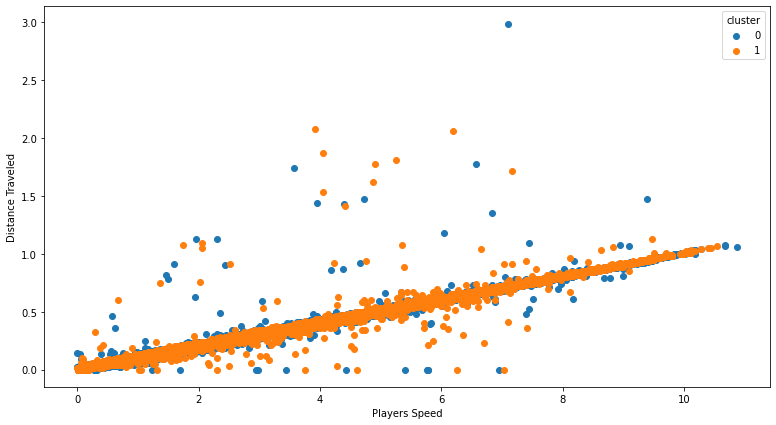

In [48]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in X_train.groupby('phys_att_cluster'):
    ax.scatter(subset.s, subset.dis, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Distance Traveled', xlabel='Players Speed')

In [44]:
kmeans.inertia_

7068.201871229294

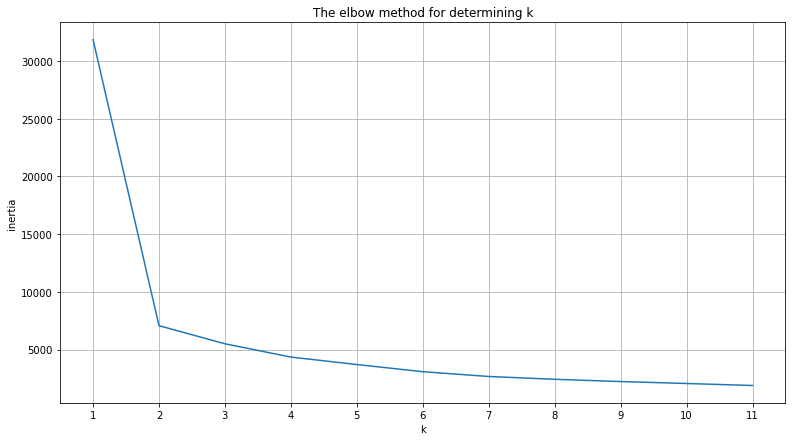

In [45]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1_train)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()